In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from global_variables import *
from clustering import *
from sklearn.cluster import KMeans, AgglomerativeClustering
import os

# Clustering

Clustering based off the encoded data and projecting the respective labels onto the original data allows us to guage what similarity measurement was discovered and used for comparison

In [2]:
# Read in encoded datasets
encoded_females_sep = pd.read_csv(os.path.join(data_path,'encoded_females_sep.csv'),index_col='customer_id')
encoded_males_sep = pd.read_csv(os.path.join(data_path,'encoded_males_sep.csv'),index_col='customer_id')
encoded_females_joint = pd.read_csv(os.path.join(data_path,'encoded_females_joint.csv'),index_col='customer_id')
encoded_males_joint = pd.read_csv(os.path.join(data_path,'encoded_males_joint.csv'),index_col='customer_id')

# Read in full-columned datasets
females = pd.read_csv(os.path.join(data_path,'females.csv'),index_col='customer_id')
males = pd.read_csv(os.path.join(data_path,'males.csv'),index_col='customer_id')

# Read in matches
matches_joint = pd.read_csv(os.path.join(data_path,'matches_sample_joint.csv'))
matches_sep = pd.read_csv(os.path.join(data_path,'matches_sample_sep.csv'))

# Establish datasets to capture differences within pairs; for use in determining types of couples
encoded_diff_joint = match_difference( encoded_males_joint, encoded_females_joint, matches_joint )
encoded_diff_sep = match_difference( encoded_males_sep, encoded_females_sep, matches_sep )
diff_joint = match_difference( males, females, matches_joint )
diff_sep = match_difference( males, females, matches_sep )

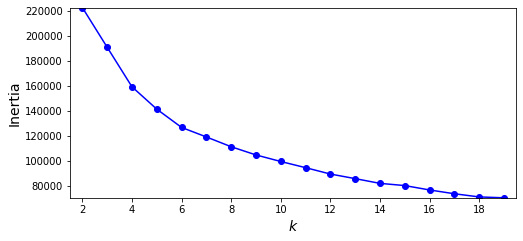

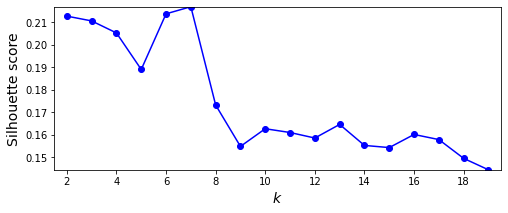

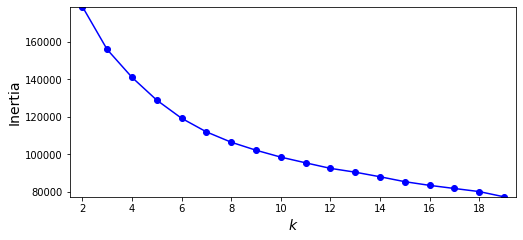

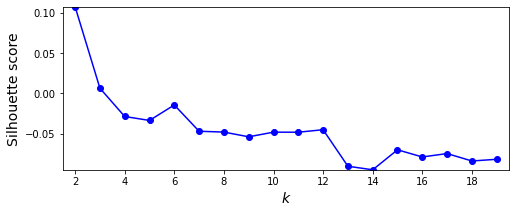

In [80]:
encoded_joint_models = explore_kmeans( list(range(2, 20)), encoded_diff_joint )
encoded_sep_models = explore_kmeans( list(range(2, 20)), encoded_diff_sep )

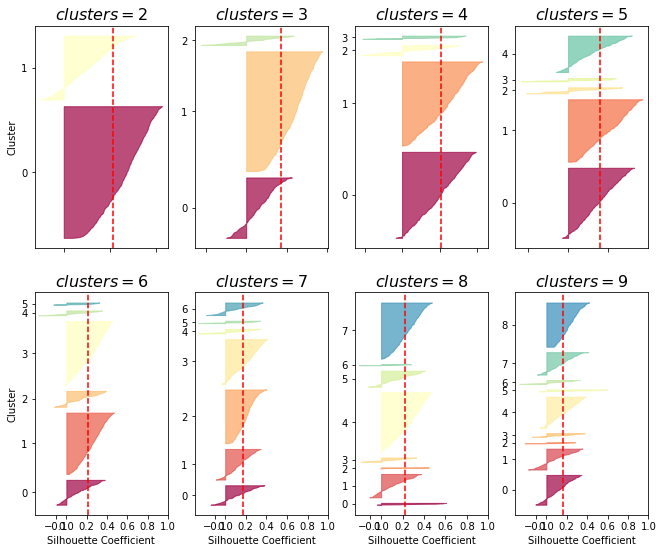

In [81]:
plot_silhouettes( encoded_joint_models[:8], encoded_diff_joint )

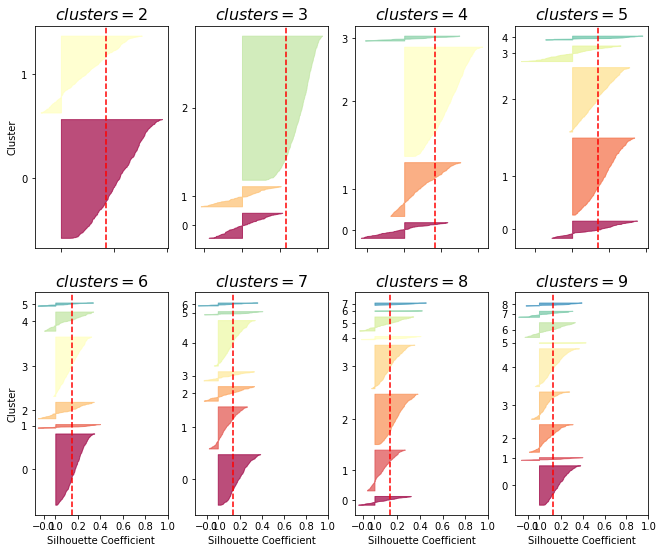

In [82]:
plot_silhouettes( encoded_sep_models[:8], encoded_diff_sep )

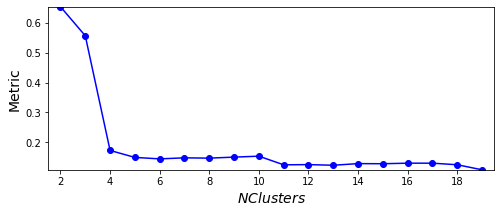

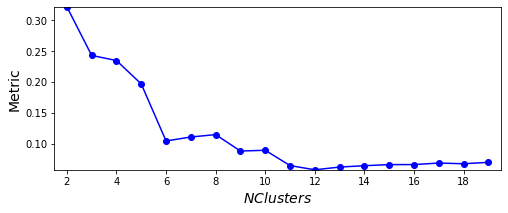

In [79]:
agg_encoded_joint_models = explore_agglomerative( list(range(2, 20)), encoded_diff_joint )
agg_encoded_sep_models = explore_agglomerative( list(range(2, 20)), encoded_diff_sep )

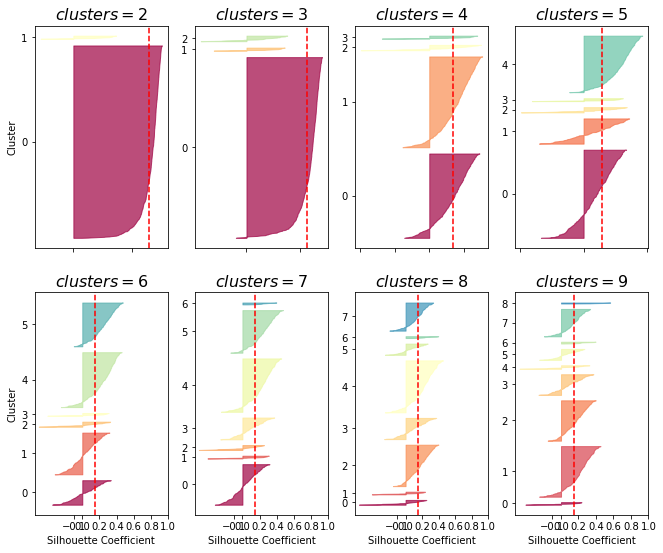

In [86]:
plot_silhouettes( agg_encoded_joint_models[:8], encoded_diff_joint )

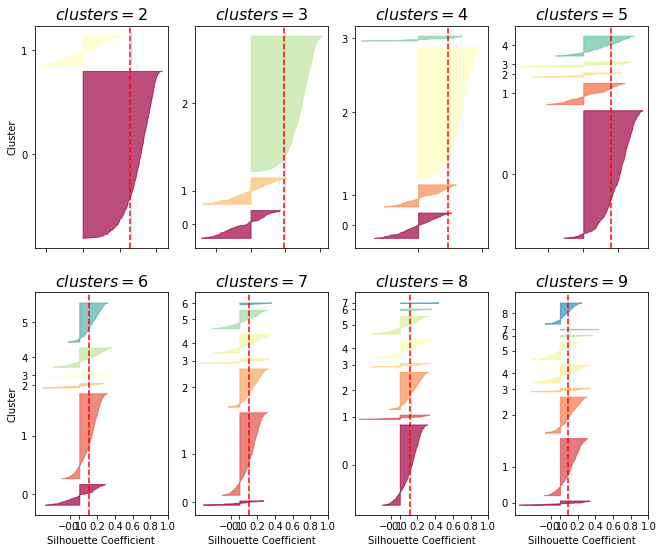

In [87]:
plot_silhouettes( agg_encoded_sep_models[:8], encoded_diff_sep )

In [5]:
from sklearn.cluster import KMeans
k = 5
random_state=42
kmeans = KMeans(n_clusters=k, random_state=random_state)

In [6]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 10
linkage = 'ward'
agglom = AgglomerativeClustering(n_clusters = n_clusters,linkage=linkage)

# Training

In [5]:
kmeans_diff_joint_centroids = cluster(KMeans(n_clusters=5), encoded_diff_joint, diff_joint, 5)
kmeans_diff_sep_centroids = cluster(KMeans(n_clusters=5), encoded_diff_sep, diff_sep, 5)

KMeans(n_clusters=5) :
	 0.19607615066681575
KMeans(n_clusters=5) :
	 0.13782875900935881


In [61]:
# 
kmeans_female_sep_centroids = cluster(kmeans, encoded_females_sep, females)
kmeans_male_sep_centroids = cluster(kmeans, encoded_males_sep, males)
kmeans_female_joint_centroids = cluster(kmeans, encoded_females_joint, females)
kmeans_male_joint_centroids = cluster(kmeans, encoded_males_joint, males)

# 
kmeans_diff_joint_centroids = cluster(kmeans, encoded_diff_joint, diff_joint)
kmeans_diff_sep_centroids = cluster(kmeans, encoded_diff_sep, diff_sep)

KMeans(n_clusters=6, random_state=42) :
	 0.1685218761957051
KMeans(n_clusters=6, random_state=42) :
	 0.2343569652565167
KMeans(n_clusters=6, random_state=42) :
	 0.2496968779053669
KMeans(n_clusters=6, random_state=42) :
	 0.2572236367155692
KMeans(n_clusters=6, random_state=42) :
	 0.21057332679094903
KMeans(n_clusters=6, random_state=42) :
	 0.14408024789279164


In [ ]:
agglom_female_sep_centroids = cluster(agglom, encoded_females_sep, females)
agglom_male_sep_centroids = cluster(agglom, encoded_males_sep, males)
agglom_female_joint_centroids = cluster(agglom, encoded_females_joint, females)
agglom_male_joint_centroids = cluster(agglom, encoded_males_joint, males)

agglom_diff_joint_centroids = cluster(agglom, encoded_diff_joint, diff_joint)
agglom_diff_sep_centroids = cluster(agglom, encoded_diff_sep, diff_sep)

# Persona

## Isolated Perspective

In [65]:
cluster_extrema( kmeans_female_sep_centroids )

,customer_main_branch_x_coord,customer_main_branch_y_coord,customer_home_x_coord,customer_home_y_coord,customer_income_level,customer_age,akbank_banking_age,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,...,trans_average_amount_TEKSTÝL,trans_average_monthly_freq_AKARYAKIT,trans_average_monthly_freq_GIDA,trans_average_monthly_freq_OTHER,trans_average_monthly_freq_RESTORAN,trans_average_monthly_freq_TEKSTÝL,statement_amount_TL_mean,statement_amount_TL_std,customer_education_level,customer_job_status
0,U,L,0.086689,L,-0.017099,U,0.204142,0,0,0,...,-0.026016,-0.02955,0.093939,-0.04078,-0.082134,-0.100909,-0.230272,-0.245095,L,8.44008
1,U,L,U,L,L,L,L,0,0,0,...,L,L,L,L,L,L,L,L,U,U
2,L,0.051372,U,0.043374,U,U,U,0,0,0,...,U,U,U,U,U,U,U,U,U,L
3,L,U,L,U,U,-0.069166,0.326506,0,0,0,...,-0.081696,-0.063678,0.05596,-0.029222,-0.014051,0.099114,-0.048077,-0.032508,5.641026,8.556777
4,0.089468,U,L,U,L,L,L,0,0,0,...,L,L,L,L,L,L,L,L,L,L
5,0.060867,0.026465,0.057289,0.012456,0.01319,0.156475,U,0,0,0,...,U,U,U,U,U,U,U,U,5.895062,U


In [66]:
cluster_extrema( kmeans_male_sep_centroids )

,customer_main_branch_x_coord,customer_main_branch_y_coord,customer_home_x_coord,customer_home_y_coord,customer_income_level,customer_age,akbank_banking_age,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,...,trans_average_amount_TEKSTÝL,trans_average_monthly_freq_AKARYAKIT,trans_average_monthly_freq_GIDA,trans_average_monthly_freq_OTHER,trans_average_monthly_freq_RESTORAN,trans_average_monthly_freq_TEKSTÝL,statement_amount_TL_mean,statement_amount_TL_std,customer_education_level,customer_job_status
0,U,-0.129487,0.101023,-0.087659,0.039428,0.088891,0.342827,0,0,0,...,0.164536,0.346466,0.338355,0.478858,0.406463,0.395012,0.383733,0.434119,U,7.83522
1,L,U,L,U,U,U,U,0,0,0,...,U,U,U,U,U,U,U,U,5.407975,L
2,U,L,0.097299,L,L,U,0.043305,0,0,0,...,L,L,L,L,L,L,L,L,L,7.627874
3,L,U,L,U,-0.006938,L,L,0,0,0,...,-0.052,0.005831,0.058153,0.028133,0.042442,0.081453,-0.120192,-0.112871,5.4375,U
4,0.100687,L,U,L,L,L,L,0,0,0,...,L,L,L,L,L,L,L,L,L,U
5,0.056263,-0.106881,U,-0.089068,U,0.384718,U,0,0,0,...,U,U,U,U,U,U,U,U,U,L


In [67]:
cluster_extrema( kmeans_female_joint_centroids )

,customer_main_branch_x_coord,customer_main_branch_y_coord,customer_home_x_coord,customer_home_y_coord,customer_income_level,customer_age,akbank_banking_age,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,...,trans_average_amount_TEKSTÝL,trans_average_monthly_freq_AKARYAKIT,trans_average_monthly_freq_GIDA,trans_average_monthly_freq_OTHER,trans_average_monthly_freq_RESTORAN,trans_average_monthly_freq_TEKSTÝL,statement_amount_TL_mean,statement_amount_TL_std,customer_education_level,customer_job_status
0,0.036823,-0.098827,0.04307,L,L,0.00534,L,0,0,0,...,L,L,L,L,L,L,L,L,L,U
1,U,L,U,-0.036704,-0.005907,0.087582,0.353897,0,0,0,...,0.113654,U,U,U,U,U,0.437919,0.363416,5.529818,8.609419
2,L,U,L,U,-0.004797,L,0.355048,0,0,0,...,0.012325,-0.025587,0.065157,-0.026732,-0.034154,0.035881,0.040285,0.163856,5.576923,8.60989
3,-0.326792,-0.063265,-0.262467,0.019352,U,U,U,0,0,0,...,U,U,U,U,U,U,U,U,U,L
4,U,L,U,L,L,L,L,0,0,0,...,L,L,L,L,L,L,L,L,L,U
5,L,U,L,U,U,U,U,0,0,0,...,U,0.032412,0.050374,0.269813,0.067497,0.190432,U,U,U,L


In [4]:
cluster_extrema( kmeans_male_joint_centroids )

NameError: name 'kmeans_male_joint_centroids' is not defined

## Relative to Partner Perspective

In [16]:
kmeans_diff_joint_centroids.describe()

,customer_main_branch_x_coord,customer_main_branch_y_coord,customer_home_x_coord,customer_home_y_coord,customer_income_level,customer_age,akbank_banking_age,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,...,trans_average_amount_TEKSTÝL,trans_average_monthly_freq_AKARYAKIT,trans_average_monthly_freq_GIDA,trans_average_monthly_freq_OTHER,trans_average_monthly_freq_RESTORAN,trans_average_monthly_freq_TEKSTÝL,statement_amount_TL_mean,statement_amount_TL_std,customer_education_level,customer_job_status
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.423382,-0.167741,0.106237,0.323499,0.055303,-0.021760,-0.034307,0.0,0.0,0.0,...,-0.407247,-0.013846,-0.034921,-0.136352,-0.088169,-0.008963,-0.348016,-0.316378,0.003909,-0.253351
std,1.749713,2.793365,1.852185,1.842490,0.169167,0.425280,0.552215,0.0,0.0,0.0,...,1.009443,0.281259,0.362670,0.578669,0.472409,0.342175,1.386652,1.516487,0.440533,0.961748
min,-1.355042,-4.288717,-2.407378,-1.611144,-0.084146,-0.364326,-0.809823,0.0,0.0,0.0,...,-2.184295,-0.325094,-0.464059,-0.949058,-0.676178,-0.473059,-2.635377,-2.811651,-0.481690,-1.433498
25%,0.001396,-0.137391,-0.003570,-0.088287,-0.042449,-0.228330,-0.364590,0.0,0.0,0.0,...,-0.244760,-0.166853,-0.355579,-0.498051,-0.475075,-0.172024,-0.616310,-0.593025,-0.441624,-0.666667
50%,0.010031,-0.035510,0.005804,-0.049515,0.010909,-0.222687,0.100484,0.0,0.0,0.0,...,0.053455,-0.146478,0.077288,0.013682,0.011361,-0.048577,0.236911,0.158266,0.142857,-0.267606
75%,0.099559,0.025926,0.113127,-0.024095,0.048029,0.005591,0.352061,0.0,0.0,0.0,...,0.087038,0.270230,0.175965,0.354220,0.303849,0.289063,0.410206,0.705809,0.333333,-0.098985
max,3.360965,3.596989,2.823203,3.390534,0.344170,0.700950,0.550333,0.0,0.0,0.0,...,0.252327,0.298964,0.391778,0.397447,0.395198,0.359782,0.864488,0.958711,0.466667,1.200000


In [9]:
kmeans_diff_sep_centroids.describe()

,customer_main_branch_x_coord,customer_main_branch_y_coord,customer_home_x_coord,customer_home_y_coord,customer_income_level,customer_age,akbank_banking_age,1)RISKSIZ,2)GECIKME 1-15 GUN,3)GECIKME 16-29 GUN,...,trans_average_amount_TEKSTÝL,trans_average_monthly_freq_AKARYAKIT,trans_average_monthly_freq_GIDA,trans_average_monthly_freq_OTHER,trans_average_monthly_freq_RESTORAN,trans_average_monthly_freq_TEKSTÝL,statement_amount_TL_mean,statement_amount_TL_std,customer_education_level,customer_job_status
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-0.234554,0.887266,-0.533947,0.735148,0.030755,-0.065001,0.074631,0.0,0.0,0.0,...,-0.074757,0.009866,0.031190,0.011665,0.036785,0.056963,-0.007410,0.032428,-0.291432,-0.708068
std,1.224128,2.445443,1.624872,1.897394,0.067272,0.696662,0.526143,0.0,0.0,0.0,...,0.541869,0.403782,0.396574,0.640530,0.644927,0.549581,1.349888,1.355329,0.723396,1.158647
min,-2.261738,-0.492009,-3.413757,-0.205498,-0.015902,-0.922775,-0.664902,0.0,0.0,0.0,...,-0.969828,-0.462798,-0.533695,-0.798492,-0.901389,-0.735076,-1.892306,-1.892993,-1.272727,-2.000000
25%,-0.026793,-0.167006,0.013092,-0.196130,-0.008428,-0.473195,-0.208750,0.0,0.0,0.0,...,-0.060654,-0.156125,-0.099334,-0.158332,-0.134811,-0.161704,-0.092668,-0.087477,-0.645833,-1.505155
50%,0.013398,-0.113514,0.027208,-0.061574,0.009604,-0.199639,0.147157,0.0,0.0,0.0,...,0.014251,-0.064687,0.059993,-0.080178,0.105900,0.137882,-0.005472,0.031523,-0.272727,-1.046296
75%,0.029130,-0.042077,0.146837,0.013659,0.020144,0.493911,0.442082,0.0,0.0,0.0,...,0.160576,0.100666,0.177491,0.115900,0.234736,0.304814,0.030193,0.180185,0.105263,0.454294
max,1.073232,5.250939,0.556887,4.125283,0.148357,0.776691,0.657565,0.0,0.0,0.0,...,0.481870,0.632275,0.551496,0.979426,0.879488,0.738901,1.923205,1.930903,0.628866,0.556818


In [6]:
cluster_extrema( kmeans_diff_joint_centroids ).to_csv('kmeans_diff_joint_centroids.csv')

In [97]:
cluster_extrema( kmeans_diff_sep_centroids ).to_csv('kmeans_diff_sep_centroids.csv')